In [1]:
import pandas as pd
import empath
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
subreddit_control = 'conspiracy'
type_of_content = 'submissions'

conspiracy_file = open(f"./data/conspiracy_submissions_wordlist.txt", "r")
conspiracy_words = conspiracy_file.read().split("\n")

control_file = open(f"./data/ukraine_submissions_wordlist.txt", "r")
control_words = control_file.read().split("\n")

categories = ['help', 'money', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'crime', 'prison', 'health', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'journalism', 'social_media', 'kill', 'ridicule', 'optimism', 'home', 'fear', 'irritability', 'business', 'exasperation', 'religion', 'internet', 'surprise', 'worship', 'leader', 'independence', 'zest', 'confusion', 'death', 'heroic', 'violence', 'dominant_heirarchical', 'military', 'neglect', 'love', 'communication', 'order', 'sympathy', 'anonymity', 'trust', 'deception', 'dominant_personality', 'meeting', 'speaking', 'disgust', 'gain', 'injury', 'rage', 'science', 'appearance', 'warmth', 'sadness', 'emotional', 'joy', 'affection', 'shame', 'torment', 'economics', 'anger', 'politics', 'strength', 'technology', 'breaking', 'power', 'terrorism', 'disappointment', 'poor', 'pain', 'philosophy', 'negative_emotion', 'friends', 'achievement', 'weapon', 'children', 'giving', 'contentment', 'positive_emotion']


In [9]:
def plotHotTopics(words, subreddit):
    lexicon = empath.Empath()
    empath_results = lexicon.analyze(words, normalize=True, categories=categories)
    empath_results_sorted = sorted(empath_results.items(), key=lambda x: x[1], reverse=True)

    plt.figure(figsize = (14, 14))

    top_ten = dict(list(empath_results_sorted)[:30])
    labels = list(top_ten.keys())
    values = list(top_ten.values())
    ax = sns.barplot(x=labels, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(f"Most prevalent lexical categories in r/{subreddit}")
    plt.xlabel("top categories")
    plt.ylabel("proportion") #better label
    plt.savefig(f"./images/empath/{subreddit}_empath_{type_of_content}.png")
    return empath_results


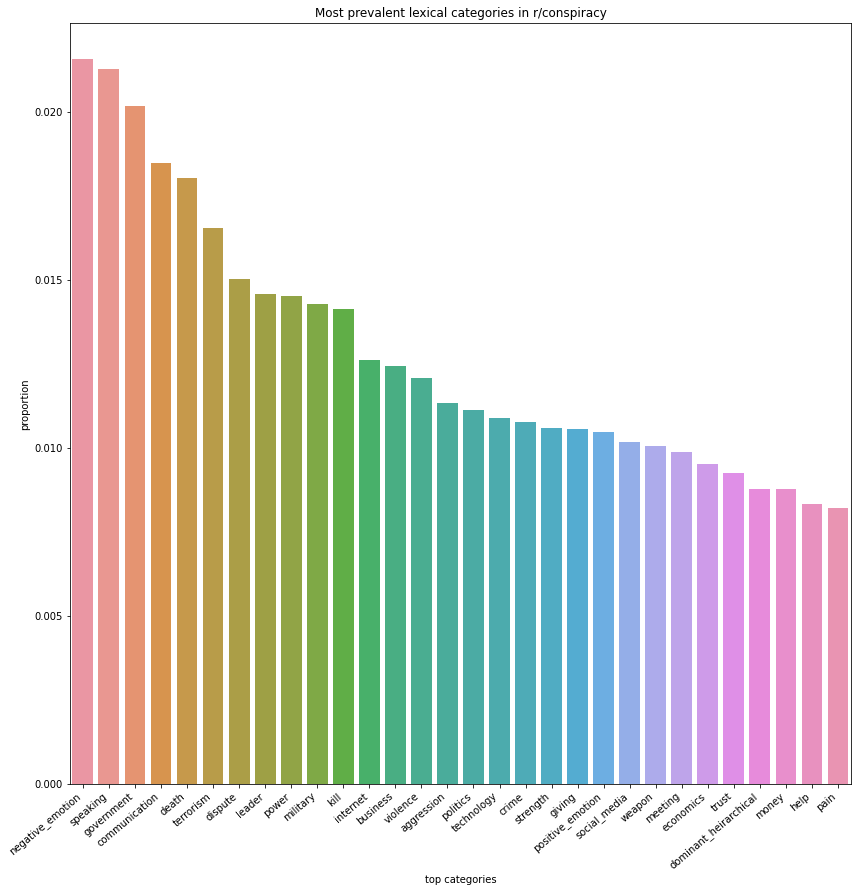

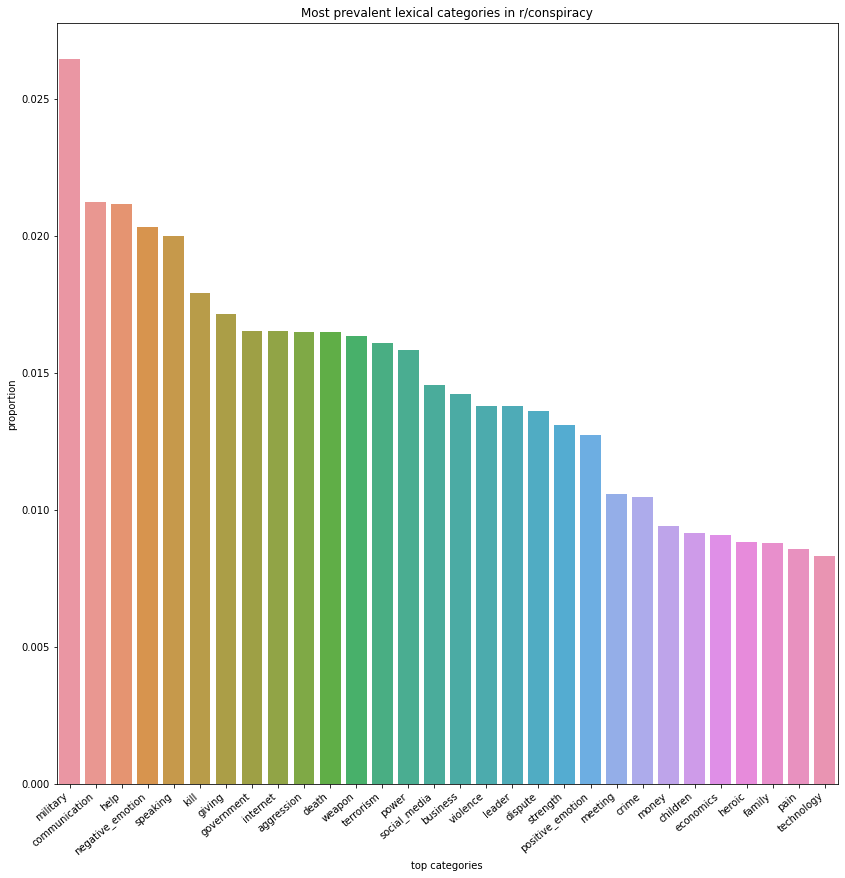

In [10]:
conspiracy_empath = plotHotTopics(conspiracy_words, 'conspiracy')
control_empath = plotHotTopics(control_words, subreddit_control)

0.07545936353514113
[('help', -0.6059014370530565), ('military', -0.46032118895423124), ('family', -0.4590682286216549), ('cheerfulness', -0.43389680120444957), ('home', -0.4207974776550841), ('warmth', -0.40225542092333816), ('weapon', -0.3853897617852064), ('giving', -0.3841269488972141), ('exasperation', -0.3778655011190993), ('heroic', -0.3308030654259011), ('aggression', -0.3131706030873247), ('social_media', -0.3021353525260499), ('friends', -0.2863575020932643), ('breaking', -0.2458340577051239), ('internet', -0.23613456116356046), ('children', -0.22795796924369208), ('optimism', -0.22374261222400088), ('affection', -0.22288282795650857), ('kill', -0.2111287151672604), ('anonymity', -0.20681207026443954), ('zest', -0.20568626240163973), ('prison', -0.20072998407662057), ('shame', 0.2108158641647693), ('love', 0.2234236044615769), ('horror', 0.22366490933232724), ('technology', 0.23633917223944914), ('fear', 0.23726515938592205), ('anticipation', 0.23746480579374066), ('swearing_

Text(0.5, 1.0, 'Empath differences between r/conspiracy and r/conspiracy')

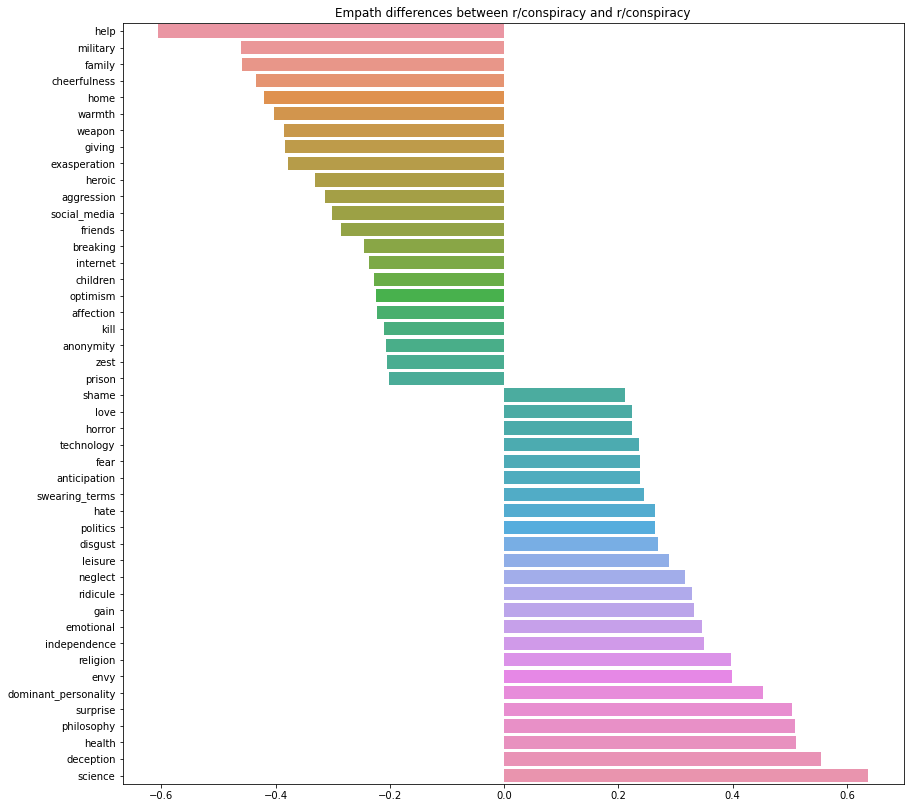

In [11]:
pooled_standard_dev = np.sqrt((np.std(list(conspiracy_empath.values())) + np.std(list(control_empath.values()))) / 2)
print(pooled_standard_dev)


differences = {}
assorted_diffs = {}
for key in conspiracy_empath:
    differences[key] = (conspiracy_empath[key] - control_empath[key]) / max(conspiracy_empath[key], control_empath[key])
    
for (key, value) in differences.items():
   if abs(value) > 0.2:
       assorted_diffs[key] = value

differences_sorted = sorted(assorted_diffs.items(), key=lambda x: x[1])
print(differences_sorted)

figure = plt.figure(figsize = (14, 14))

#top_ten = dict(list(differences_sorted)[:5] + list(differences_sorted[-5:]))
top_ten = dict(list(differences_sorted))
labels = list(top_ten.keys())
values = list(top_ten.values())
ax = sns.barplot(x=values, y=labels)
plt.title(f"Empath differences between r/conspiracy and r/{subreddit_control}")
#plt.savefig(f"./images/empath/empath_differences_conspiracy_{subreddit_control}_{type_of_content}.png")
